在数据挖掘中，分类算法可以说是核心算法，其中 AdaBoost 算法与随机森林算法一样都属于分类算法中的集成算法。

集成的含义就是集思广益，博取众长，当我们做决定的时候，我们先听取多个专家的意见，再做决定。集成算法通常有两种方式，分别是投票选举（bagging）和再学习（boosting）。投票选举的场景类似把专家召集到一个会议桌前，当做一个决定的时候，让 K 个专家（K 个模型）分别进行分类，然后选择出现次数最多的那个类作为最终的分类结果。再学习相当于把 K 个专家（K 个分类器）进行加权融合，形成一个新的超级专家（强分类器），让这个超级专家做判断。

所以你能看出来，投票选举和再学习还是有区别的。Boosting 的含义是提升，它的作用是每一次训练的时候都对上一次的训练进行改进提升，在训练的过程中这 K 个“专家”之间是有依赖性的，当引入第 K 个“专家”（第 K 个分类器）的时候，实际上是对前 K-1 个专家的优化。而 bagging 在做投票选举的时候可以并行计算，也就是 K 个“专家”在做判断的时候是相互独立的，不存在依赖性。

**AdaBoost 的工作原理**

了解了集成算法的两种模式之后，我们来看下今天要讲的 AdaBoost 算法。

AdaBoost 的英文全称是 Adaptive Boosting，中文含义是自适应提升算法。它由 Freund 等人于 1995 年提出，是对 Boosting 算法的一种实现。

什么是 Boosting 算法呢？Boosting 算法是集成算法中的一种，同时也是一类算法的总称。这类算法通过训练多个弱分类器，将它们组合成一个强分类器，也就是我们俗话说的“三个臭皮匠，顶个诸葛亮”。为什么要这么做呢？因为臭皮匠好训练，诸葛亮却不好求。因此要打造一个诸葛亮，最好的方式就是训练多个臭皮匠，然后让这些臭皮匠组合起来，这样往往可以得到很好的效果。这就是 Boosting 算法的原理。

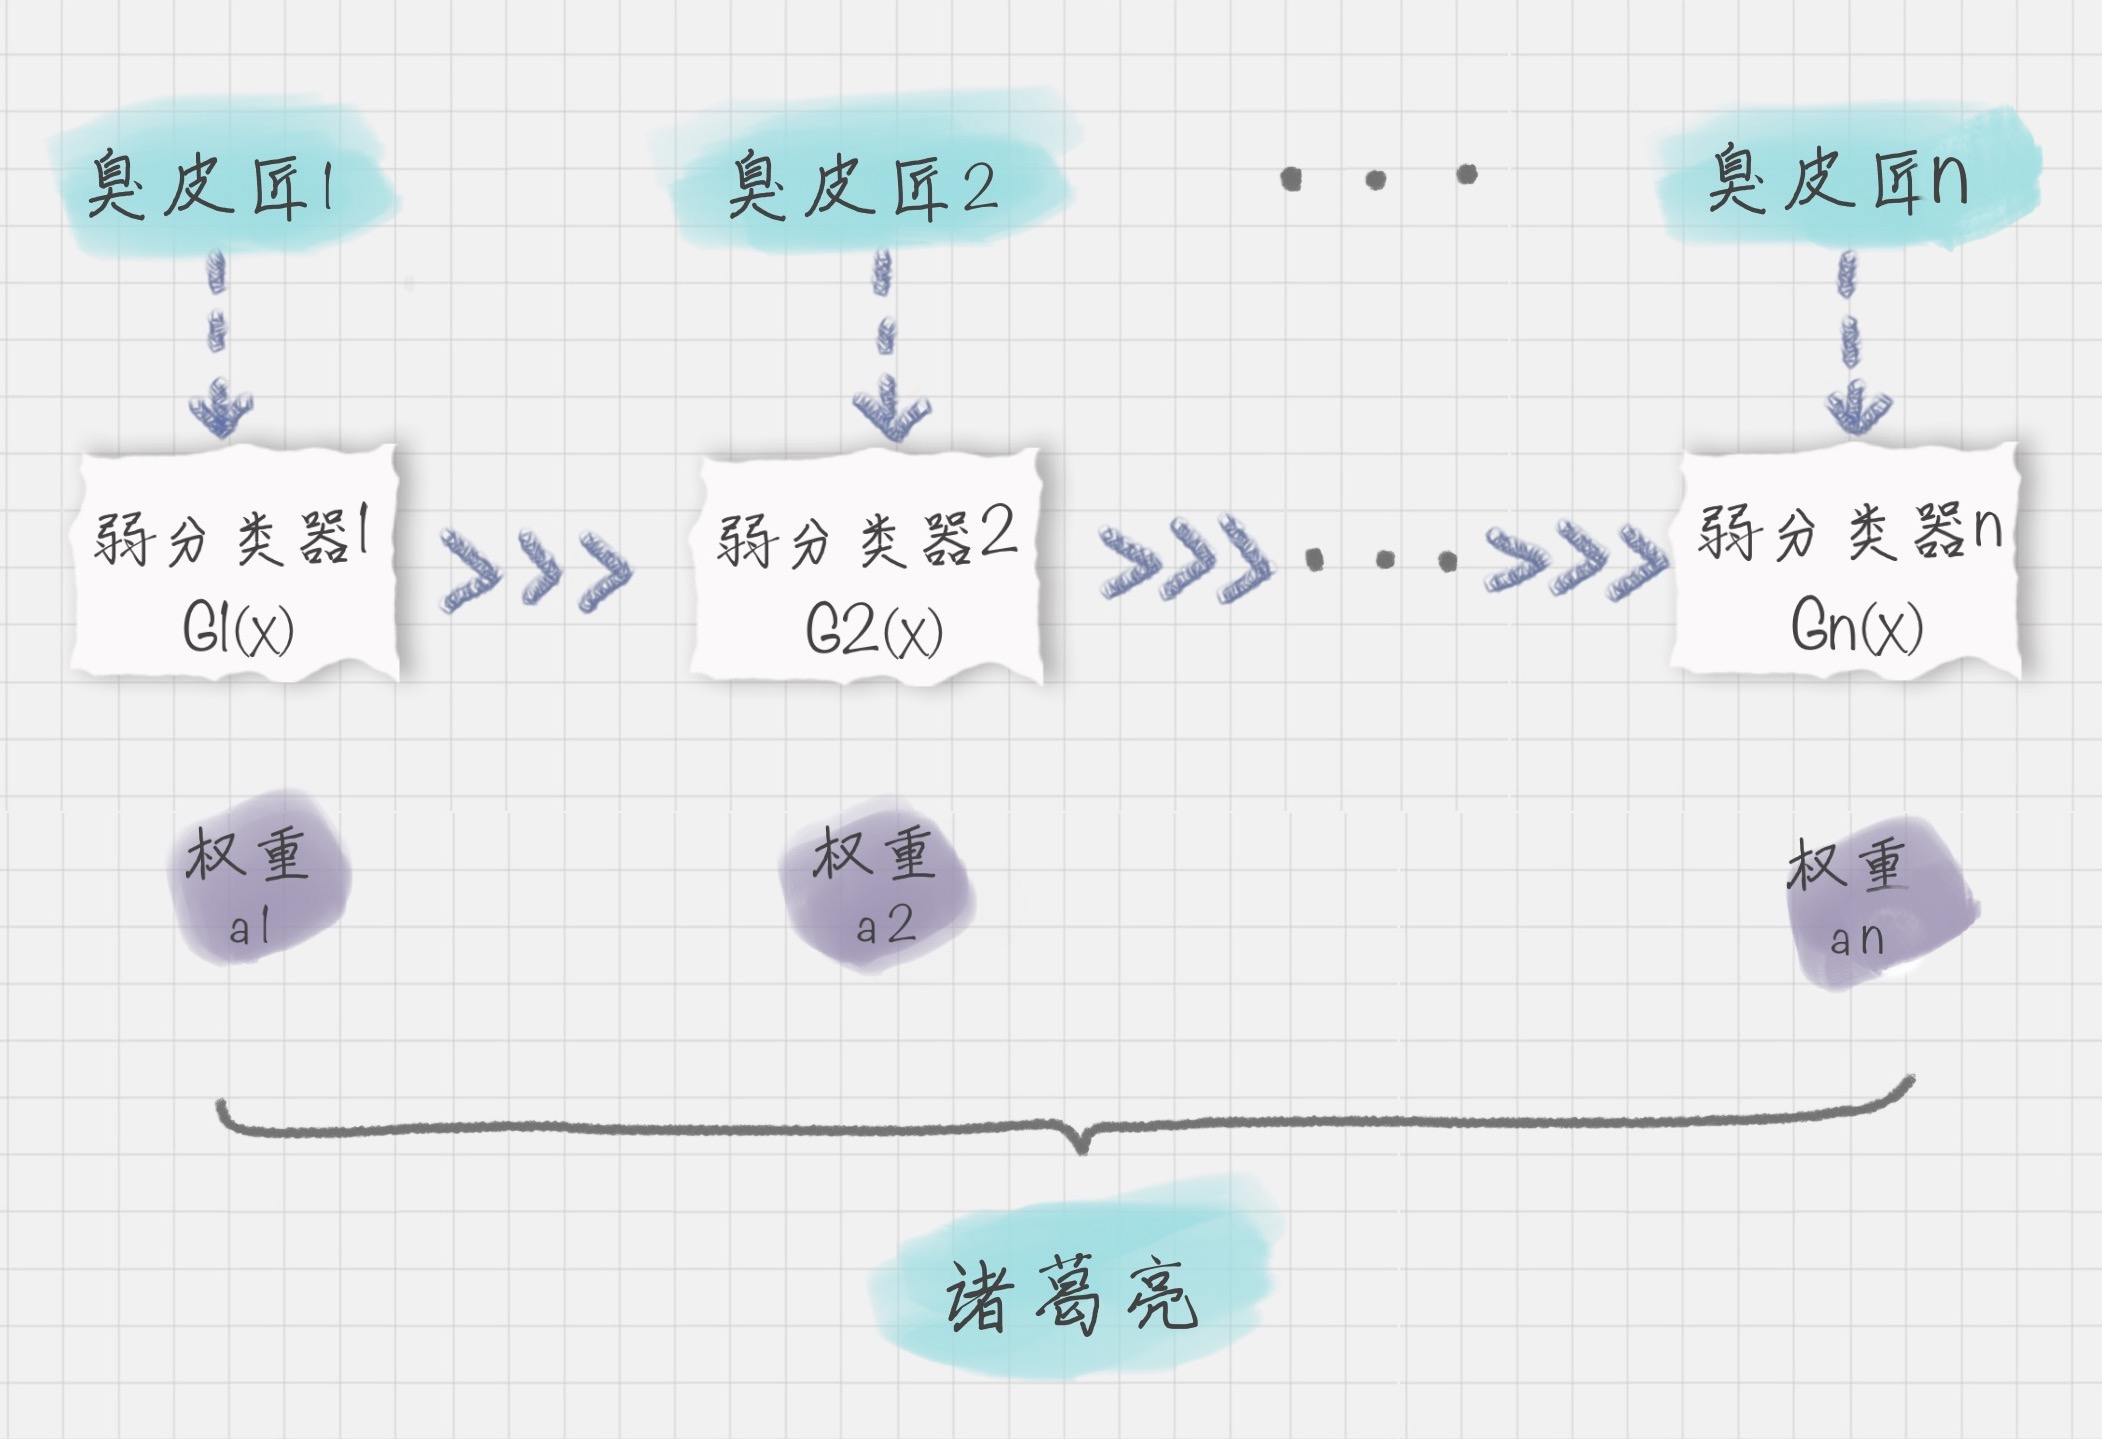

我可以用上面的图来表示最终得到的强分类器，你能看出它是通过一系列的弱分类器根据不同的权重组合而成的。

假设弱分类器为 Gi(x)，它在强分类器中的权重 αi，那么就可以得出强分类器 f(x)：

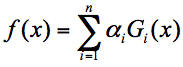

有了这个公式，为了求解强分类器，你会关注两个问题：

1、如何得到弱分类器，也就是在每次迭代训练的过程中，如何得到最优弱分类器？

2、每个弱分类器在强分类器中的权重是如何计算的？

我们先来看下第二个问题。实际上在一个由 K 个弱分类器中组成的强分类器中，如果弱分类器的分类效果好，那么权重应该比较大，如果弱分类器的分类效果一般，权重应该降低。所以我们需要基于这个弱分类器对样本的分类错误率来决定它的权重，用公式表示就是：

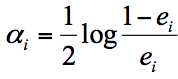

其中 ei 代表第 i 个分类器的分类错误率。

然后我们再来看下第一个问题，如何在每次训练迭代的过程中选择最优的弱分类器？

实际上，AdaBoost 算法是通过改变样本的数据分布来实现的。AdaBoost 会判断每次训练的样本是否正确分类，对于正确分类的样本，降低它的权重，对于被错误分类的样本，增加它的权重。再基于上一次得到的分类准确率，来确定这次训练样本中每个样本的权重。然后将修改过权重的新数据集传递给下一层的分类器进行训练。这样做的好处就是，通过每一轮训练样本的动态权重，可以让训练的焦点集中到难分类的样本上，最终得到的弱分类器的组合更容易得到更高的分类准确率。

我们可以用 Dk+1 代表第 k+1 轮训练中，样本的权重集合，其中 Wk+1,1 代表第 k+1 轮中第一个样本的权重，以此类推 Wk+1,N 代表第 k+1 轮中第 N 个样本的权重，因此用公式表示为：

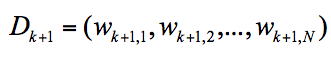

第 k+1 轮中的样本权重，是根据该样本在第 k 轮的权重以及第 k 个分类器的准确率而定，具体的公式为：

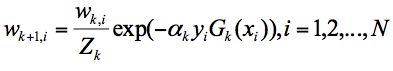

**AdaBoost 算法示例**

了解 AdaBoost 的工作原理之后，我们看一个例子，假设我有 10 个训练样本，如下所示：

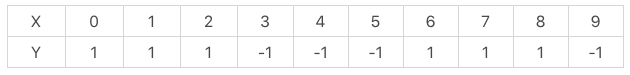

现在我希望通过 AdaBoost 构建一个强分类器。该怎么做呢？按照上面的 AdaBoost 工作原理，我们来模拟一下。

首先在第一轮训练中，我们得到 10 个样本的权重为 1/10，即初始的 10 个样本权重一致，D1=(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)。

假设我有 3 个基础分类器：

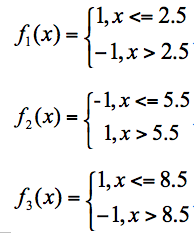

我们可以知道分类器 f1 的错误率为 0.3，也就是 x 取值 6、7、8 时分类错误；分类器 f2 的错误率为 0.4，即 x 取值 0、1、2、9 时分类错误；分类器 f3 的错误率为 0.3，即 x 取值为 3、4、5 时分类错误。

这 3 个分类器中，f1、f3 分类器的错误率最低，因此我们选择 f1 或 f3 作为最优分类器，假设我们选 f1 分类器作为最优分类器，即第一轮训练得到：

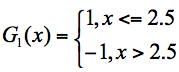

根据分类器权重公式得到：

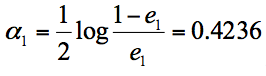

然后我们对下一轮的样本更新求权重值，代入 Wk+1,i 和 Dk+1 的公式，可以得到新的权重矩阵：D2=(0.0715, 0.0715, 0.0715, 0.0715, 0.0715, 0.0715, 0.1666, 0.1666, 0.1666, 0.0715)。

在第二轮训练中，我们继续统计三个分类器的准确率，可以得到分类器 f1 的错误率为 0.1666*3，也就是 x 取值为 6、7、8 时分类错误。分类器 f2 的错误率为 0.0715*4，即 x 取值为 0、1、2、9 时分类错误。分类器 f3 的错误率为 0.0715*3，即 x 取值 3、4、5 时分类错误。

在这 3 个分类器中，f3 分类器的错误率最低，因此我们选择 f3 作为第二轮训练的最优分类器，即：

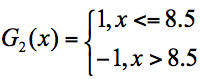

根据分类器权重公式得到：

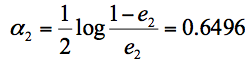

同样，我们对下一轮的样本更新求权重值，代入 Wk+1,i 和 Dk+1 的公式，可以得到 D3=(0.0455,0.0455,0.0455,0.1667, 0.1667,0.01667,0.1060, 0.1060, 0.1060, 0.0455)。

在第三轮训练中，我们继续统计三个分类器的准确率，可以得到分类器 f1 的错误率为 0.1060*3，也就是 x 取值 6、7、8 时分类错误。分类器 f2 的错误率为 0.0455*4，即 x 取值为 0、1、2、9 时分类错误。分类器 f3 的错误率为 0.1667*3，即 x 取值 3、4、5 时分类错误。

在这 3 个分类器中，f2 分类器的错误率最低，因此我们选择 f2 作为第三轮训练的最优分类器，即：

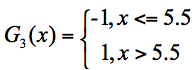

我们根据分类器权重公式得到：

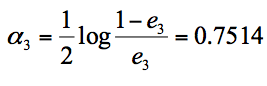

假设我们只进行 3 轮的训练，选择 3 个弱分类器，组合成一个强分类器，那么最终的强分类器 G(x) = 0.4236G1(x) + 0.6496G2(x)+0.7514G3(x)。

实际上 AdaBoost 算法是一个框架，你可以指定任意的分类器，通常我们可以采用 CART 分类器作为弱分类器。通过上面这个示例的运算，你体会一下 AdaBoost 的计算流程即可。

**总结**

今天我给你讲了 AdaBoost 算法的原理，你可以把它理解为一种集成算法，通过训练不同的弱分类器，将这些弱分类器集成起来形成一个强分类器。在每一轮的训练中都会加入一个新的弱分类器，直到达到足够低的错误率或者达到指定的最大迭代次数为止。实际上每一次迭代都会引入一个新的弱分类器（这个分类器是每一次迭代中计算出来的，是新的分类器，不是事先准备好的）。

在弱分类器的集合中，你不必担心弱分类器太弱了。实际上它只需要比随机猜测的效果略好一些即可。如果随机猜测的准确率是 50% 的话，那么每个弱分类器的准确率只要大于 50% 就可用。AdaBoost 的强大在于迭代训练的机制，这样通过 K 个“臭皮匠”的组合也可以得到一个“诸葛亮”（强分类器）。

当然在每一轮的训练中，我们都需要从众多“臭皮匠”中选择一个拔尖的，也就是这一轮训练评比中的最优“臭皮匠”，对应的就是错误率最低的分类器。当然每一轮的样本的权重都会发生变化，这样做的目的是为了让之前错误分类的样本得到更多概率的重复训练机会。

同样的原理在我们的学习生活中也经常出现，比如善于利用错题本来提升学习效率和学习成绩。

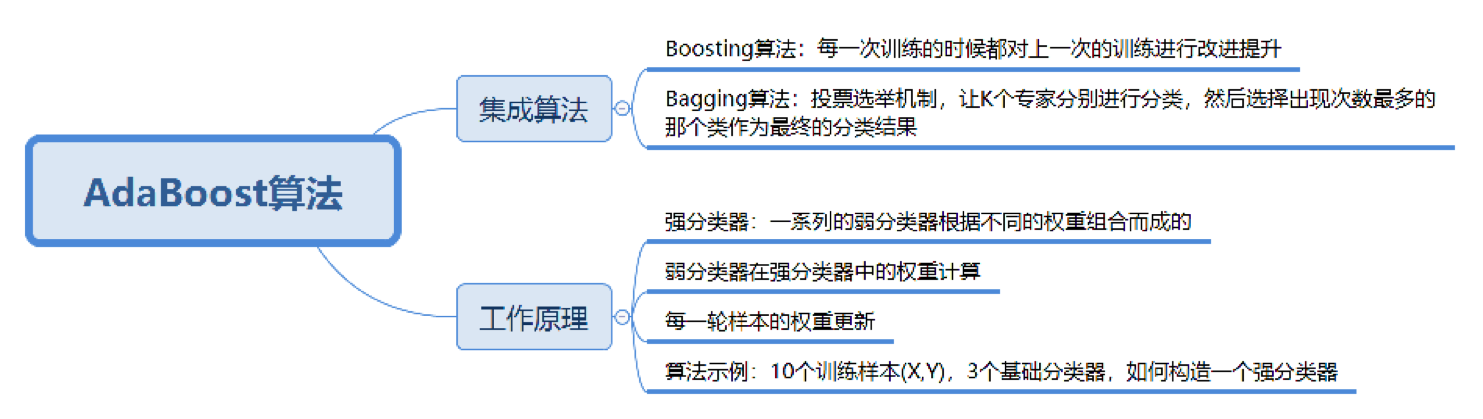

最后你能说说你是如何理解 AdaBoost 中弱分类器，强分类器概念的？另外，AdaBoost 算法是如何训练弱分类器从而得到一个强分类器的？

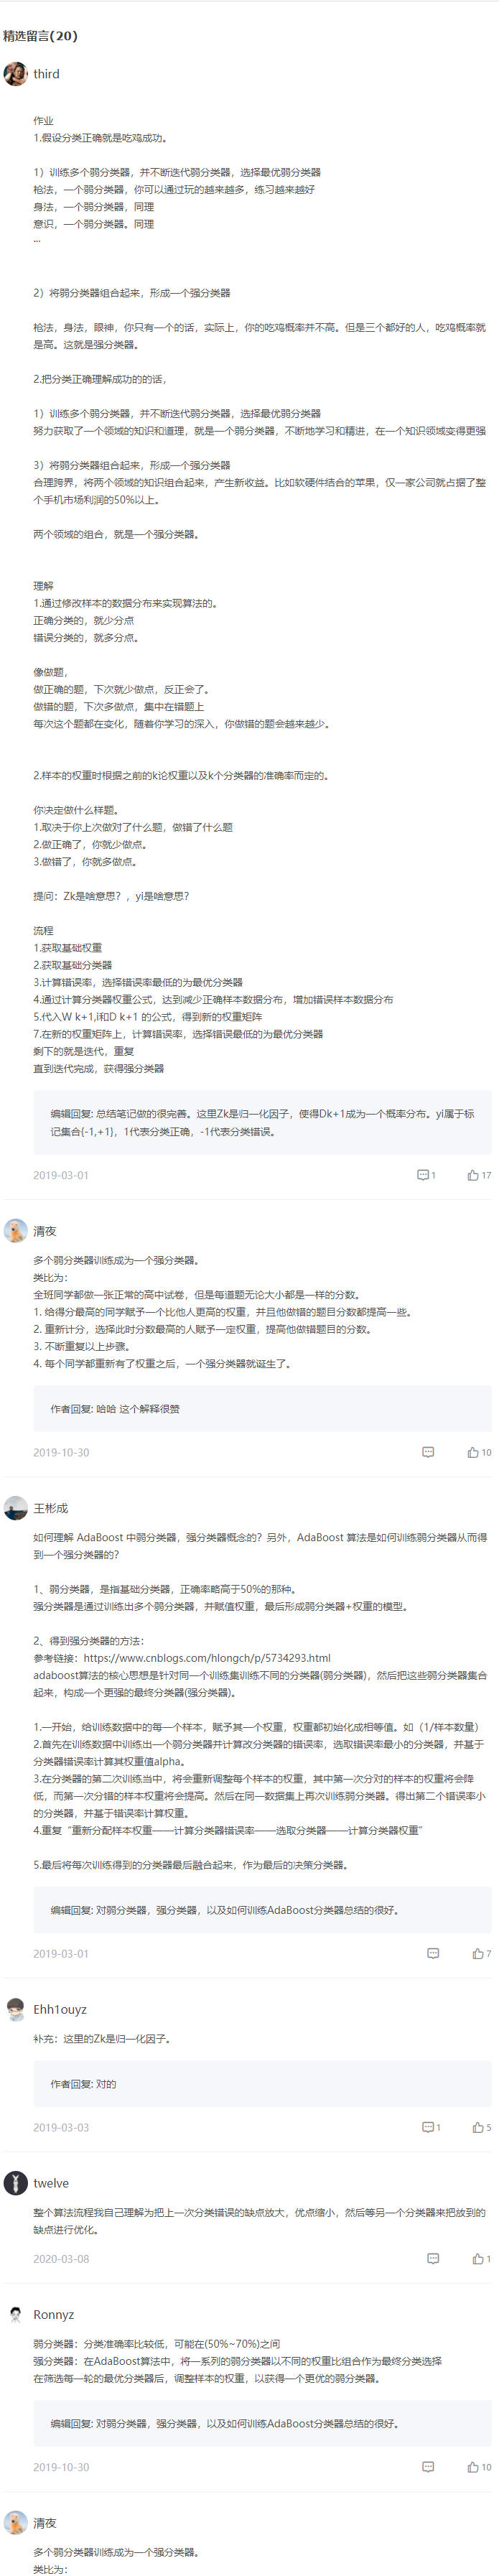